<div align="center" style="color: #2471A3; font-size: 30px; font-weight: bold;">Knapsack Problem</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Team 4</div>
<div align="right" style="font-size: 15px; font-weight: normal;">[Our names]</div>

# Contents

1. [Introduction](#intro)
    1. [Model](#intro.model)
    2. [Optimization problem](#intro.optp)
    3. [0-1 Knapsack problem](#intro.knapsack01)
2. [Classic approach](#classic)
    1. [Simple example](#classic.example)
3. [Quantum approach](#quantum)
    1. [Qiskit Optimization Module](#quantum.module.opt)
    2. [Converters for quadratic programs](#quantum.converters)
    3. [Solving with Qiskit](#quantum.solving)
        1. [Solve with `NumPyMinimumEigensolver`](#quantum.solving.classic)
        2. [Solve with `QAOA`](#quantum.solving.qaoa)
        3. [What about the Hamiltonian?](#quantum.solving.hamiltonian)
        4. [Solve with `VQE`](#quantum.solving.vqe)
4. [Benchmark between approaches](#benchmark)
5. [References](#refs)

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<a id="intro"></a>
# Introduction

It is essential that humans make decisions all the time, with different levels of importance and complexity. These decisions are usually based on emotions or personal tastes, however, we cannot always allow these subjective characteristics to be the ones that determine the results of a decision. Therefore, a quantitative formulation that takes into account all the factors that influence a decision is desired.

To achieve this goal, it must be possible to represent the effect of any decision by numerical values. In the most basic case, the decision outcome can be measured by a single value representing profit, benefit, loss, cost, or some other category of data. The comparison of these values induces a total order in the set of all the options that are available to make a decision. Finding the option with the highest or lowest value can be difficult because the set of available options can be extremely large and/or not explicitly known.

[...]

<a id="intro.model"></a>
## Model

Formally speaking, the linear decision model is defined by $n$ **binary variables** $x_j\in\{0,1\}$ corresponding to the selection in the $j$-th binary decision and by the **benefit values** $p_j$ that indicate the difference in value obtained by choosing the first alternative, that is, $x_j=1 $, instead of the second alternative ($x_j = 0$). Without loss of generality we can assume that after a proper assignment of the two options to the two cases $x_j=1 $ and $x_j=0$, we always have $p_j\geq 0 $. The overall payoff value associated with a particular choice for all binary decisions $N$ is given by the sum of all values $p_j$ for all decisions in which the first alternative was selected.

 

In this model, the feasibility of a selection of alternatives is determined by a capacity constraint as follows. In each binary decision $j$, the selection of the first alternative ($x_j=1$) requires a **weight** or **resource** $w_j$ while choosing the second alternative ($x_j=0$) does not require it. A selection of alternatives is feasible if the sum of weights over all binary decisions does not exceed a given threshold capability value, $W$ (sometimes called $c$). If this decision process is considered as an optimization problem, where the total benefit should be as large as possible, the **Knapsack Problem (KP)** occurs.


This feature of the problem gives rise to the following interpretation of KP, which is more colorful than the combination of binary decision problems. Think of a mountaineer who is packing his backpack (or knapsack) for a trek up the mountain and has to decide what items he should take with him. He has a lot of items available that can be useful in his journey. Each of these items numbered from $1$ to $N$ would give you a certain amount of comfort or benefit that is measured by a positive number $p_j$. Of course, the weight $w_j$ of each item the mountaineer puts in his backpack increases the load he has to carry. For obvious reasons, he wants to limit the total weight of his knapsack and therefore sets the maximum load to a capacity value of $W$.

<a id="intro.optp"></a>
## Optimization problem

In mathematics, computer science, and economics, an optimization problem is the problem of finding the best solution from all feasible solutions.

The standard form of an optimization problem is

\begin{align*}
\texttt{minimize} \;\;\; &f(x)\\
\texttt{subject to} \;\;\; &g_i(x)\leq 0, \;\;\;\; i = 1,\cdots ,m\\
&h_j(x)=0, \;\;\;\; j = 1,\cdots ,p
\end{align*}

Where,

- $f:\mathbb{R}^n\rightarrow\mathbb{R}$ is the **objective function** to be minimized over the vector $x$ of $n$ variables
- $g_i(x)\leq 0$ are called inequality constraints
- $h_j(x)= 0$ are called equality constraints
- $m\geq 0$ and $p\geq 0$

If $m=p=0$ the problem is an unrestricted optimization. By convention, the standard form defines a *minimization problem*. A *maximization problem* can be addressed by multiplying the objective function by $-1$.

<a id="intro.knapsack01"></a>
## 0-1 Knapsack problem

The 0-1 knapsack problem (KP), which restricts the number $x_j$ of copies of each type of item to zero or one, can be formally defined as follows: We are given an instance of the knapsack problem with the set of items $N'=\{1,\dots,N\}$, consisting of $N$ elements, the $j$-th with profit $p_j$ and weight $w_j$, and the value of capacity $W$. (Usually all of these values are positive integers). The goal then is to select a subset of $N'$ such that the total profit of the selected items is maximized and the total weight does not exceed $W$.

\begin{align*}
\texttt{maximize} \;\;\; &\sum_{j=1}^{N}p_jx_j
\label{eq:maximize} \tag{1}\\
\texttt{subject to} \;\;\; &\sum_{j=1}^{N}w_jx_j \leq W \;,
\label{eq:subject_to} \tag{2}\\
&x_j\in\{0,1\} \; , \;\; j=1,\dots,N
\label{eq:x_in_01_j} \tag{3}\\
\end{align*}

Let's denote the _optimal solution vector_ by $x^*=(x_i^*,\dots,x_N^*)$ and the _optimal solution value_ by $z^*$. The set $X^*$ denotes the _optimal solution set_, that is, the set of elements corresponding to the optimal solution vector.

The KP problem is the simplest nontrivial integer programming model with binary variables, only one constraint, and only positive coefficients. However, adding the integrality condition $\eqref{eq:x_in_01_j}$ to the simple linear program $\eqref{eq:maximize}$-$\eqref{eq:subject_to}$ already puts KP in the problem class "difficult", i.e. is a NP-hard problem.

<a id="classic"></a>
# Classic approach

A simple solution is to consider all item subsets and calculate the total weight and value of all subsets. Consider the only subsets whose total weight is less than $W$. Of all these subsets, choose the subset with the maximum value. This is either a _recursion with a brute force algorithm_ or an _exhaustive search_.

As you might be guessing, this naive approach is not very good, since the same subproblems are computed over and over again, leading to redundancies. It has a time complexity of $O\left(2^N\right)$ and an auxiliary space of $O(1)$.

A better approach is to use [Dynamic Programming (DP)](https://es.wikipedia.org/wiki/Programaci%C3%B3n_din%C3%A1mica#:~:text=En%20inform%C3%A1tica%2C%20la%20programaci%C3%B3n%20din%C3%A1mica,como%20se%20describe%20a%20continuaci%C3%B3n.), the recalculation of the same subproblems can be avoided by building a temporary matrix from the bottom up.

Using Dynamic Programming, we will work considering the two cases as mentioned above (an element is selected or not). In an array called `K[][]`, let's consider all possible weights from $1$ to $W$ as columns, and the resulting holdable weights as rows.

Cell `K[j][w]` will denote the maximum value of "weight w" considering all values from $1$ to $j$. So, if we consider `wj` (weight on _jth_ row), we can fill it in on all columns that have "weight values > `wj`". Two possibilities can occur:

- Fill `wj` in the given column.
- Do not fill `wj` in the given column.

Now, we have to take a maximum of these two possibilities, formally if we don't fill the _j-th_ weight in the _w-th_ column, then cell `K[j][w]` will be the same as cell `K[j- 1][w]` cell, but if we fill the weight, `K[j][w]` will be equal to the value of `wj` + value of the column weighing `wj` in the previous row. So, we take the maximum of these two possibilities to fill the current cell.

In [16]:
# Dynamic programming for the 0-1 knapsack problem
# Returns the maximum value that can be put in a knapsack of capacity W


def knapsackDP(W, wt, val, N):
    
    K = [[0 for x in range(W + 1)] for x in range(N + 1)]
 
    # Build table K[][] from bottom to top
    for j in range(N + 1):
        for w in range(W + 1):
            if j == 0 or w == 0:
                K[j][w] = 0
            elif wt[j-1] <= w:
                K[j][w] = max(val[j-1] + K[j-1][w-wt[j-1]], K[j-1][w])
            else:
                K[j][w] = K[j-1][w]
 
    return K[N][W], K

<a id="classic.example"></a>
## Simple example

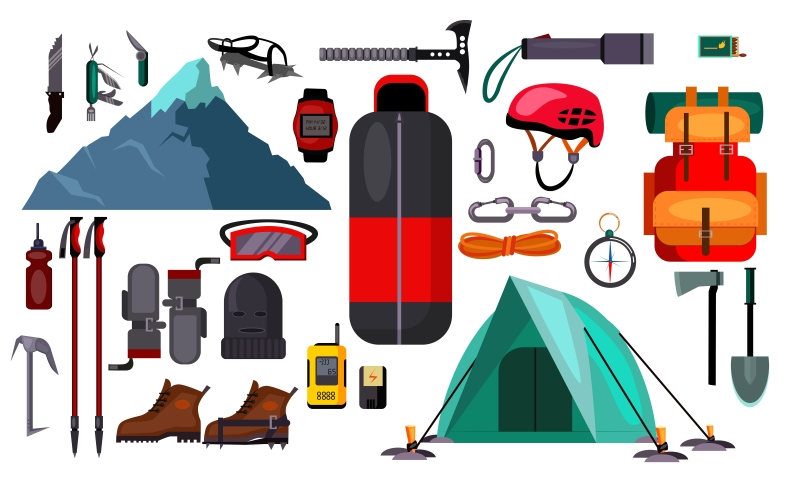

Suppose a short trip for the mountaineer, in which he does not need to consider various items such as a sleeping bag, his plan is to travel alone for a few hours, he also does not consider climbing steep slopes, so he decides to carry a small backpack ($W=7$), now he must decide which items to take, knowing the benefit that each item brings him, make the following list:

<table>
    <tr style="background-color:gray;">
        <td style="border: 1px solid black;">
            <div align="center">Item</div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">Benefit</div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">Weight</div>
        </td>
    </tr>
    <tr style="background-color:white;">
        <td style="border: 1px solid black;">
            <div align="center">
                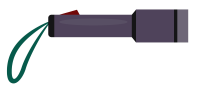
            </div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">6</div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">5</div>
        </td>
    </tr>
    <tr style="background-color:white;">
        <td style="border: 1px solid black;">
            <div align="center">
                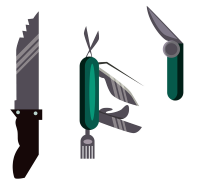
            </div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">10</div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">2</div>
        </td>
    </tr>
    <tr style="background-color:white;">
        <td style="border: 1px solid black;">
            <div align="center">
                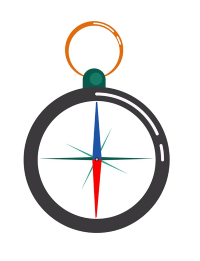
            </div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">12</div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">1</div>
        </td>
    </tr>
    <tr style="background-color:white;">
        <td style="border: 1px solid black;">
            <div align="center">
                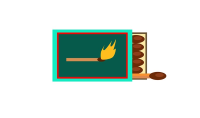
            </div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">5</div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">1</div>
        </td>
    </tr>
    <tr style="background-color:white;">
        <td style="border: 1px solid black;">
            <div align="center">
                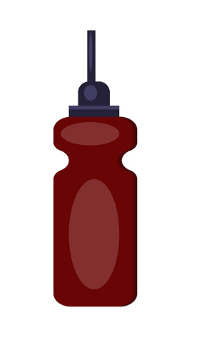
            </div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">8</div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">4</div>
        </td>
    </tr>
</table>

Based on this information, the mountaineer must make a decision, for which he uses his function carried out with dynamic programming to solve his problem, so the approach is as follows:

In [17]:
# Simple example
val = [6, 10, 12, 5, 8]   # p_j (benefits)
wt =  [5,  2,  1, 1, 4]   # w_j (weights)
W = 7                     # max weight
N = len(val)              # number of items

max_benefit, K = knapsackDP(W, wt, val, N)

print("The optimized perk inside the backpack is: ", max_benefit)

The optimized perk inside the backpack is:  30


In [18]:
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in K]))

   0   0   0   0   0   0   0   0
   0   0   0   0   0   6   6   6
   0   0  10  10  10  10  10  16
   0  12  12  22  22  22  22  22
   0  12  17  22  27  27  27  27
   0  12  17  22  27  27  27  30


The execution time of the above function is dominated by the $N+1$ iterations of the first `for` loop (since Python lists are indexed from 0), each containing at most $W+1$ iterations where a new solution of a subproblem is computed. This produces a total execution time of $O(NW)$. Therefore, we have presented a pseudopolynomial algorithm for KP. The necessary space requirement of this implementation would also be $O(NW)$. It should be noted that this function only calculates the optimal solution value $z^*$ but does not explicitly return the corresponding optimal solution set $X^*$, which by the way corresponds to the selection of elements $j=2,3,5 $ (with profit values $10$, $12$ and $8$ respectively).

That is, the optimal selection of items to carry in the backpack is:

<table>
    <tr style="background-color:white;">
        <td style="border: 1px solid black;">
            <div align="center">
                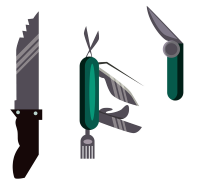
            </div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">
                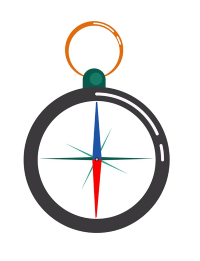
            </div>
        </td>
        <td style="border: 1px solid black;">
            <div align="center">
                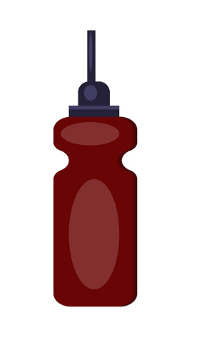
            </div>
        </td>
    </tr>
</table>

<a id="quantum"></a>
# Quantum approach

The resulting optimization problem, as stated in equations (1), (2) and (3), can be assigned to a **Hamiltonian** whose [ground state](https://es.wikipedia.org/ wiki/Fundamental_state_(f%C3%ADsica)) (or state of minimum energy) corresponds to the **optimal solution**. So the problem must be stated in Hamiltonian form. For this there are already many model proposals, let's briefly see one.

In [A. Lucas (2014)] presents a simple Hamiltonian for the backpack problem: Let $y_r$ for $1 \leq r \leq W $ be a binary variable that is $1$ if the final weight of the backpack is $r$, and $0$ otherwise. The proposed solution consists in defining $H = H_A + H_B$, with

$$H_A=A\left(1-\sum^{W}_{r=1}y_r\right)^2+A\left(\sum^{W}_{r=1}r\,y_r-\sum^{N}_{j=1}w_{j}x_{j}\right)^2$$

[...]

[add more detail]

Proposing these Hamiltonians is not an easy task, and once raised, the mapping must be done to solve it in a quantum computer that works with [quantum circuits](https://en.wikipedia.org/wiki/Quantum_circuit), as they are IBM devices.

Qiskit has been in charge of generating libraries within its SDK that allow us to solve a fairly wide range of problems, by having implementations for this purpose and allowing us to access these functionalities with little high-level code. An example of this is the module called [Qiskit Optimization](https://qiskit.org/documentation/apidoc/qiskit_optimization.html), which is capable of solving optimization problems as stated in general in the previous section called [Optimization problem](#intro.optp).

<a id="quantum.module.opt"></a>
## Qiskit Optimization Module

The [Qiskit optimization module](https://qiskit.org/documentation/apidoc/qiskit_optimization.html) covers the whole range from high-level modeling of optimization problems, with automatic conversion of problems to different required representations , to a set of easy-to-use quantum optimization algorithms that are ready to run on classic simulators as well as real quantum devices via Qiskit.

This module enables easy and efficient modeling of optimization problems using [docplex](https://developer.ibm.com/docloud/documentation/optimization-modeling/modeling-for-python/). A uniform interface, as well as automatic conversion between different problem representations, allows users to solve problems using a large set of algorithms.

[...]

<a id="quantum.converters"></a>
## Converters for quadratic programs

Optimization problems in the Qiskit optimization module are represented by the `QuadraticProgram` class, which is a powerful generic representation of optimization problems. In general, the optimization algorithms are defined for a certain formulation of a quadratic program and we need to convert our problem to the correct type.

For example, Qiskit provides several optimization algorithms that can handle quadratic unconstrained binary optimization (QUBO) problems. These map to Hamiltonians of type [Ising](https://en.wikipedia.org/wiki/Ising_model). For this optimization, algorithms commonly known as VQE or QAOA can be used as the underlying routine.

For more details see the tutorial [Converters for Quadratic Programs](https://qiskit.org/documentation/optimization/tutorials/02_converters_for_quadratic_programs.html).

<a id="quantum.solving"></a>
## Solving with Qiskit

Let's do the necessary imports:

In [6]:
from qiskit_optimization.applications import Knapsack           # main class for this kind of problem 
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit import Aer, BasicAer

We will solve an instance of the backpack problem with 5 items, as seen in the classic approach, using different Qiskit solvers.

In [7]:
values  = [6, 10, 12, 5, 8]   # list of profit values of items
weights = [5,  2,  1, 1, 4]   # item weight list
max_weight = 7                # maximum weight capacity (knapsack capacity)

# define the problem we want to solve
# We use the Knapsack class which is part of the qiskit-optimization module
problem = Knapsack(values = values, weights = weights, max_weight = max_weight)

Let's convert the knapsack problem instance into a `QuadraticProgram`.

The `QuadraticProgram` class is what helps us represent an optimization problem within Qiskit.

See the [Quadratic Programs](https://qiskit.org/documentation/optimization/tutorials/01_quadratic_program.html) tutorial for more details.

In [8]:
qp = problem.to_quadratic_program()

# mostremos los detalles del programa cuadrático
print(qp)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Maximize
 obj: 6 x_0 + 10 x_1 + 12 x_2 + 5 x_3 + 8 x_4
Subject To
 c0: 5 x_0 + 2 x_1 + x_2 + x_3 + 4 x_4 <= 7

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End



From the `QuadraticProgram` shown above, we can see that it defines 5 variables $x_j$ (indexed at 0) and that they are subject to the constraint $0\leq x_j\leq 1$, since we want their values to be only _chosen = _ $1$ or _not chosen =_ $0$, as defined in equation (3).

It also specifies what we want to maximize:

$$6x_0 + 10x_1 + 12x_2 + 5x_3 + 8x_4$$

as defined by equation (1), as well as the constraint:

$$3x_0 + 2x_1 + 1x_2 + 1x_3 + 4x_4 <= 7$$

which should be applied as defined in equation (2).

Now let's solve the problem with **different optimizers** provided by Qiskit.

Finding the solution to a QUBO (unrestricted quadratic binary optimization problem) is equivalent to finding the ground state of a corresponding Hamiltonian Ising, which is an important problem not only in optimization, but also in quantum chemistry and physics. For this translation, binary variables that take values in $\{0,1\}$ are replaced by spin variables that take values in $\{−1, +1\}$, which allows to replace the spin variables resulted by [Pauli Z-matrices](https://en.wikipedia.org/wiki/Pauli_matrices), and therefore, an Ising Hamiltonian. For more details on this mapping, see [A. Luke (2014)].

Qiskit provides automatic conversion from a proper `QuadraticProgram` to a Hamiltonian of type Ising, which then allows you to take advantage of the entire solver system with `MinimumEigenSolver`, such as: `VQE`, `QAOA` or `NumpyMinimumEigensolver` (classical exact method).

See [Minimum Eigen Optimizer](https://qiskit.org/documentation/optimization/tutorials/03_minimum_eigen_optimizer.html) for more details.

<a id="quantum.solving.classic"></a>
### Solve with `NumPyMinimumEigensolver`, classic reference

In [9]:
# Numpy Eigensolver

meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', problem.interpret(result))

result:
 optimal function value: 30.0
optimal value: [0. 1. 1. 0. 1.]
status: SUCCESS

solution:
 [1, 2, 4]


<a id="quantum.solving.qaoa"></a>
### Solve with `QAOA`

QAOA (Quantum Approximate Optimization Algorithm) introduced by [Farhi et al. (2014)] is a quantum algorithm that tries to solve this kind of combinatorial problems.

[...]

In [10]:
# QAOA

seed = 123
algorithm_globals.random_seed = seed
qinstance = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000, 
                            seed_simulator=seed, seed_transpiler=seed)

meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qinstance))
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', problem.interpret(result))
print('\nexecution time:', result.min_eigen_solver_result.optimizer_time)

result:
 optimal function value: 30.0
optimal value: [0. 1. 1. 0. 1.]
status: SUCCESS

solution:
 [1, 2, 4]

execution time: 0.8624110221862793


As we can see, using both solvers we get the same result in our example problem:

$$[1, 2, 4]$$

This indicates that these items are the ones that can be carried in the backpack without exceeding the maximum weight, and the values of the chosen items are maximized, these numbers are the indices of the selected items (remember that it is indexed from 0).

<a id="quantum.solving.hamiltonian"></a>
### What about the Hamiltonian?

If you want to check the Hamiltonian that is generated during the solving process (by the `MinimumEigenOptimizer`), you need to perform this intermediate step yourself, i.e.

In [13]:
from qiskit_optimization.converters import QuadraticProgramToQubo

# intermediate QUBO form of the optimization problem
converter = QuadraticProgramToQubo()
qubo = converter.convert(qp)

# let's show the details of the QUBO form
print(qubo)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Minimize
 obj: - 2946 x_0 - 1186 x_1 - 600 x_2 - 593 x_3 - 2360 x_4 - 588 c0@int_slack@0
      - 1176 c0@int_slack@1 - 2352 c0@int_slack@2 + [ 2100 x_0^2 + 1680 x_0*x_1
      + 840 x_0*x_2 + 840 x_0*x_3 + 3360 x_0*x_4 + 840 x_0*c0@int_slack@0
      + 1680 x_0*c0@int_slack@1 + 3360 x_0*c0@int_slack@2 + 336 x_1^2
      + 336 x_1*x_2 + 336 x_1*x_3 + 1344 x_1*x_4 + 336 x_1*c0@int_slack@0
      + 672 x_1*c0@int_slack@1 + 1344 x_1*c0@int_slack@2 + 84 x_2^2
      + 168 x_2*x_3 + 672 x_2*x_4 + 168 x_2*c0@int_slack@0
      + 336 x_2*c0@int_slack@1 + 672 x_2*c0@int_slack@2 + 84 x_3^2 + 672 x_3*x_4
      + 168 x_3*c0@int_slack@0 + 336 x_3*c0@int_slack@1 + 672 x_3*c0@int_slack@2
      + 1344 x_4^2 + 672 x_4*c0@int_slack@0 + 1344 x_4*c0@int_slack@1
      + 2688 x_4*c0@int_slack@2 + 84 c0@int_slack@0^2
      + 336 c0@int_slack@0*c0@int_slack@1 + 672 c0@int_slack@0*c0@int_slack@2
      + 336 c0@int_slack@1^2 + 13

Let's see the Ising-type Hamiltonian of this problem:

In [14]:
# Hamiltoniano and offset
operator, offset = qubo.to_ising()

print(f'number of qubits: {operator.num_qubits}, offset: {offset}\n')

print(operator)

number of qubits: 8, offset: 1071.5

-627.0 * IIIIIIIZ
- 247.0 * IIIIIIZI
- 120.0 * IIIIIZII
- 123.5 * IIIIZIII
- 500.0 * IIIZIIII
- 126.0 * IIZIIIII
- 252.0 * IZIIIIII
- 504.0 * ZIIIIIII
+ 210.0 * IIIIIIZZ
+ 105.0 * IIIIIZIZ
+ 42.0 * IIIIIZZI
+ 105.0 * IIIIZIIZ
+ 42.0 * IIIIZIZI
+ 21.0 * IIIIZZII
+ 420.0 * IIIZIIIZ
+ 168.0 * IIIZIIZI
+ 84.0 * IIIZIZII
+ 84.0 * IIIZZIII
+ 105.0 * IIZIIIIZ
+ 42.0 * IIZIIIZI
+ 21.0 * IIZIIZII
+ 21.0 * IIZIZIII
+ 84.0 * IIZZIIII
+ 210.0 * IZIIIIIZ
+ 84.0 * IZIIIIZI
+ 42.0 * IZIIIZII
+ 42.0 * IZIIZIII
+ 168.0 * IZIZIIII
+ 42.0 * IZZIIIII
+ 420.0 * ZIIIIIIZ
+ 168.0 * ZIIIIIZI
+ 84.0 * ZIIIIZII
+ 84.0 * ZIIIZIII
+ 336.0 * ZIIZIIII
+ 84.0 * ZIZIIIII
+ 168.0 * ZZIIIIII


<a id="quantum.solving.vqe"></a>
### Solve with `VQE`

VQE is an application of the variational method of quantum mechanics:

$$\lambda_{min}\leq\langle H\rangle_{\psi}=\bra{\psi}H\ket{\psi} = \sum_{i=1}^{N}\lambda_i|\braket{ \psi_i}{\psi}|^2$$

[...]

In [11]:
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import EfficientSU2

In [15]:
# VQE

seed = 123
algorithm_globals.random_seed = seed
qinstance = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000, 
                            seed_simulator=seed, seed_transpiler=seed)

ansatz = EfficientSU2(operator.num_qubits, reps=2, entanglement='circular')
optimizer = SPSA(maxiter=15)

meo = MinimumEigenOptimizer(min_eigen_solver=VQE(ansatz = ansatz, optimizer = optimizer, quantum_instance = qinstance))
result = meo.solve(qp)
print('result:\n', result)
print('\nsolution:\n', problem.interpret(result))
print('\ntime:', result.min_eigen_solver_result.optimizer_time)

result:
 optimal function value: 30.0
optimal value: [0. 1. 1. 0. 1.]
status: SUCCESS

solution:
 [1, 2, 4]

time: 11.874231100082397


<a id="benchmark"></a>
# Benchmark between approaches

[...]

<a id="refs"></a>
# References

[need to review]
- [H. Kellerer, U. Pferschy, D. Pisinger (2004). Knapsack Problems. Springer-Verlag Berlin Heidelberg. ISBN 978-3-642-07311-3](https://www.springer.com/gp/book/9783540402862)
- [S. Martello, P. Toth (1990). Knapsack Problems: Algorithms and Computer Implementations. John Wiley & Sons Ltd. ISBN 0-471-92420-2](https://books.google.com/books/about/Knapsack_Problems.html?id=0dhQAAAAMAAJ)
- [A. Lucas, Ising formulations of many NP problems, Front. Phys., 12 (2014).](https://arxiv.org/abs/1302.5843)
- [A. Lucas, Hard combinatorial problems and minor embeddings on lattice graphs, Quantum Information Processing, vol. 18, no. 7, (2019)](https://arxiv.org/abs/1812.01789)
- [Qiskit’s optimization module](https://qiskit.org/documentation/apidoc/qiskit_optimization.html)
- [Converters for Quadratic Programs](https://qiskit.org/documentation/optimization/tutorials/02_converters_for_quadratic_programs.html)
- [Quadratic Programs](https://qiskit.org/documentation/optimization/tutorials/01_quadratic_program.html)
- [Minimum Eigen Optimizer](https://qiskit.org/documentation/optimization/tutorials/03_minimum_eigen_optimizer.html)
- [Farhi, Edward, Jeffrey Goldstone, and Sam Gutmann. A quantum approximate optimization algorithm, (2014)](https://arxiv.org/abs/1411.4028)
- [Solving combinatorial optimization problems using QAOA](https://qiskit.org/textbook/ch-applications/qaoa.html#Combinatorial-Optimization-Problem)
- [Simulating Molecules using VQE](https://qiskit.org/textbook/ch-applications/vqe-molecules.html)
- [Knapsack problem, WIP qiskit tutorial](https://github.com/Qiskit/qiskit-optimization/pull/202)
- [Imagenes de libre acceso tomadas de **freepik**](https://www.freepik.com/)